In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from scipy import stats


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("ETData.csv")

print(df.head(10))

# List of columns to keep
columns_to_keep = ['Life Expectancy (Years)', 'Schooling (average number of years completed)', 'Status']

# Drop every column except specified columns
df = df[columns_to_keep]

df = df.dropna()

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

       Country  Year      Status  \
0  Afghanistan  2015  Developing   
1  Afghanistan  2014  Developing   
2  Afghanistan  2013  Developing   
3  Afghanistan  2012  Developing   
4  Afghanistan  2011  Developing   
5  Afghanistan  2010  Developing   
6  Afghanistan  2009  Developing   
7  Afghanistan  2008  Developing   
8  Afghanistan  2007  Developing   
9  Afghanistan  2006  Developing   

   Adult Mortality (probability of dying between 15 and 60 years per 1000 people)  \
0                                              263.0                                
1                                              271.0                                
2                                              268.0                                
3                                              272.0                                
4                                              275.0                                
5                                              279.0                                
6       

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 0 to 2937
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Life Expectancy (Years)                        2768 non-null   float64
 1   Schooling (average number of years completed)  2768 non-null   float64
 2   Status                                         2768 non-null   object 
dtypes: float64(2), object(1)
memory usage: 86.5+ KB


In [4]:
df.head(-10)

,Life Expectancy (Years),Schooling (average number of years completed),Status
0,65.0,10.1,Developing
1,59.9,10.0,Developing
2,59.9,9.9,Developing
3,59.5,9.8,Developing
4,59.2,9.5,Developing
...,...,...,...
2923,59.2,10.3,Developing
2924,58.0,10.4,Developing
2925,56.6,9.8,Developing
2926,54.9,10.1,Developing


In [5]:
train_df.corr()['Life Expectancy (Years)']

Life Expectancy (Years)                          1.000000
Schooling (average number of years completed)    0.750312
Name: Life Expectancy (Years), dtype: float64

<AxesSubplot:xlabel='Schooling (average number of years completed)', ylabel='Life Expectancy (Years)'>

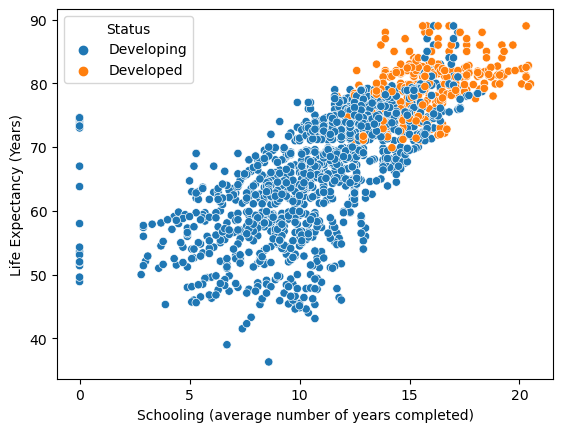

In [6]:
sns.scatterplot(data=train_df, y='Life Expectancy (Years)', x="Schooling (average number of years completed)", hue = "Status")

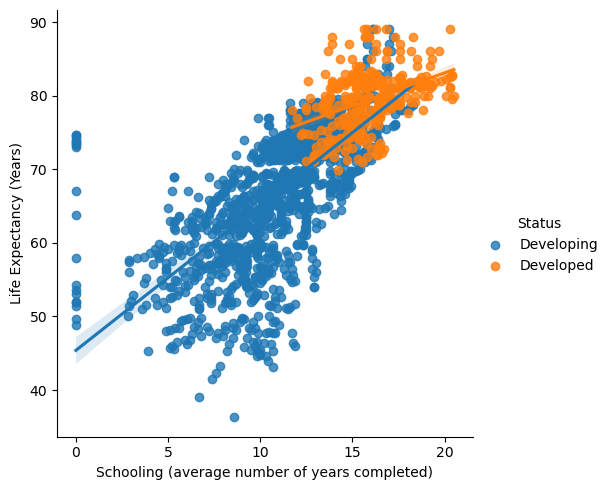

In [7]:
sns.lmplot(data=train_df, y='Life Expectancy (Years)', x="Schooling (average number of years completed)", hue = "Status");

In [8]:
developed_df = train_df[train_df['Status'] == "Developed"]
developed_slope, developed_intercept, developed_r_value, developed_p_value, developed_std_err = stats.linregress(developed_df['Schooling (average number of years completed)'], developed_df['Life Expectancy (Years)'])

# Print the equation of the regression line
print(f"y = {developed_slope:.2f}x + {developed_intercept:.2f}")

y = 0.89x + 65.30


In [9]:
developing_df = train_df[train_df['Status'] == "Developing"]
developing_slope, developing_intercept, developing_r_value, developing_p_value, developing_std_err = stats.linregress(developing_df['Schooling (average number of years completed)'], developing_df['Life Expectancy (Years)'])

# Print the equation of the regression line
print(f"y = {developing_slope:.2f}x + {developing_intercept:.2f}")

y = 1.97x + 45.40


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the equations for prediction based on "Status"
def predict_life_expectancy(status, x):
    if status == "Developed":
        return 0.89 * x + 65.30
    elif status == "Developing":
        return 1.97 * x + 45.40

# Apply the prediction function to the test data
test_df['Predicted Life Expectancy'] = test_df.apply(lambda row: predict_life_expectancy(row['Status'], row['Schooling (average number of years completed)']), axis=1)

# Calculate evaluation metrics
mae = mean_absolute_error(test_df['Life Expectancy (Years)'], test_df['Predicted Life Expectancy'])
mse = mean_squared_error(test_df['Life Expectancy (Years)'], test_df['Predicted Life Expectancy'])
r_squared = r2_score(test_df['Life Expectancy (Years)'], test_df['Predicted Life Expectancy'])

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")


Mean Absolute Error: 4.49
Mean Squared Error: 37.55
R-squared: 0.58


In [18]:
prediction_row = pd.read_csv("PredictET.csv").iloc[0]
print("Prediction: "+str(predict_life_expectancy(prediction_row['Status'], prediction_row['Schooling (average number of years completed)'])))

Prediction: 75.97999999999999
